<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regularization</a></span></li></ul></div>

# Packages

In [1]:
import cvxpy as cp
import numpy as np
import seaborn as sns

# Data

In [2]:
m = 100
n = 10 + 990
A = np.random.randn(m, n)
theta = np.random.randn(10)
b = A[:, :10] @ theta + 1e-2 * np.random.randn(m)

In [3]:
A.shape, b.shape, theta.shape

((100, 1000), (100,), (10,))

# Regression

<AxesSubplot:>

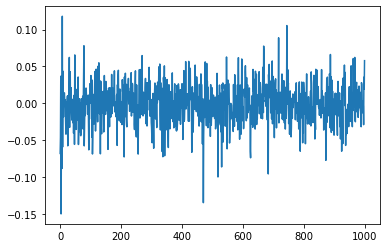

In [4]:
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
prob = cp.Problem(objective)
result = prob.solve()
sns.lineplot(x=np.arange(len(x.value)), y=x.value)

<AxesSubplot:>

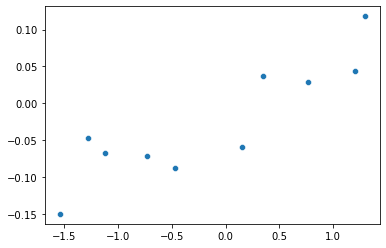

In [5]:
sns.scatterplot(x=theta, y=x.value[:10])

# Regularization

<AxesSubplot:>

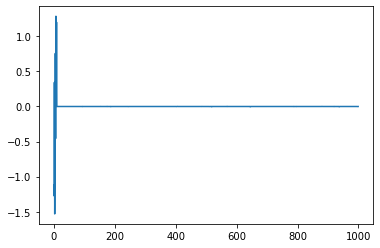

In [6]:
x = cp.Variable(n)
objective = cp.Minimize(0.5/len(A) * cp.sum_squares(A @ x - b) + 0.00001 * cp.norm1(x))
prob = cp.Problem(objective)
result = prob.solve()
sns.lineplot(x=np.arange(len(x.value)), y=x.value)

<AxesSubplot:>

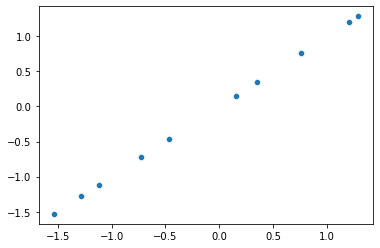

In [7]:
sns.scatterplot(x=theta, y=x.value[:10])